# Information Theory - Assignment 1

#### Name: Patrick Keogh
#### Student Number: 19321326

This Jupyter notebook runs the provided Go source code and uses the returned values to plot bar charts of the distributions using the Python matplot library. There is also a html file provided for this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import re
import json

In [2]:
def go_run(filepath, args=None):
    try:
        cmd = ['go', 'run', filepath] + args
        return(subprocess.check_output(cmd, stderr=subprocess.STDOUT).decode())
    except subprocess.CalledProcessError as e:
        print('Error:', e.output.decode())

In [3]:
n = '5'
p = '0.2'

In [4]:
output = go_run('main.go', ['1', '1000', n, p])
print(output)

Support: [0, 1, 2, 3, 4, 5]
Theoretical: [0.3276800000000001, 0.40959999999999996, 0.20480000000000004, 0.051199999999999996, 0.006400000000000004, 0.0003200000000000001]



In [5]:
print("Outcomes: ")
print(go_run('main.go', ['2', '1000', n, p]))

Outcomes: 
[323, 425, 199, 45, 8, 0]



In [6]:
print("Outcomes: ")
print(go_run('main.go', ['3', '1000', n, p]))

Outcomes: 
[350, 369, 214, 60, 5, 2]



In [7]:
def plot_distributions(output, m):
    theoretical = json.loads(re.search(r"Theoretical: (\[.*?\])", output).group(1))
    support = np.arange(int(n) + 1)
    
    empirical_cdf = np.array(json.loads(go_run('main.go', ['2', str(m), n, p])))/m
    empirical_bernoulli = np.array(json.loads(go_run('main.go', ['3', str(m), n, p])))/m
        
    # Set up the plot
    width = 0.2
    plt.figure(figsize=(10, 7))
    plt.bar(support - width, theoretical, width, label='Theoretical Distribution')
    plt.bar(support, empirical_cdf, width, label='Empirical Distribution (cdf)')
    plt.bar(support + width, empirical_bernoulli, width, label='Empirical Distribution (Bernoulli)')
    plt.xlabel("Number of Successes")
    plt.ylabel("Probability")
    plt.title(f"Distributions with n = {n}, m = {m}, p = {p}")
    plt.legend()
    plt.show()

### Empirical Distribution for m = 10^2

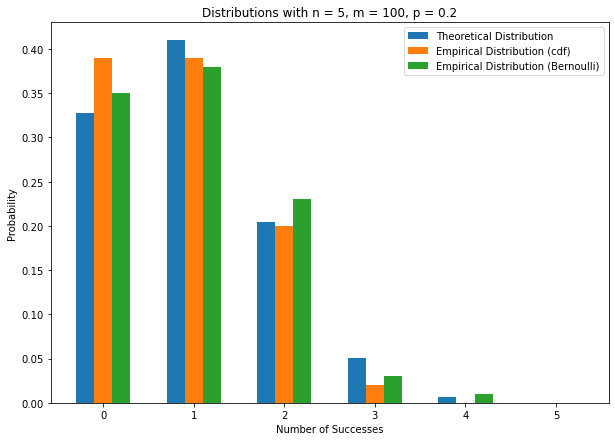

In [12]:
plot_distributions(output, 10 ** 2)

### Empirical Distribution for m = 10^4

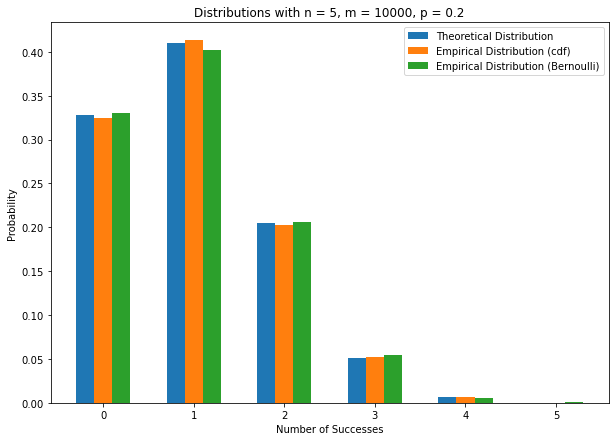

In [13]:
plot_distributions(output, 10 ** 4)